# Setup

In [6]:
include(joinpath("..","src","interactive_setup.jl"))
datadir = joinpath("..","data","count_lengths","run_2018-11-26")
PlotAxes.set_backend!(:ggplot2)

:ggplot2

# next steps

1. implement build up again, run a simulation for it (probably introduce more noise)
2. re-run context experiment

# context stimuli

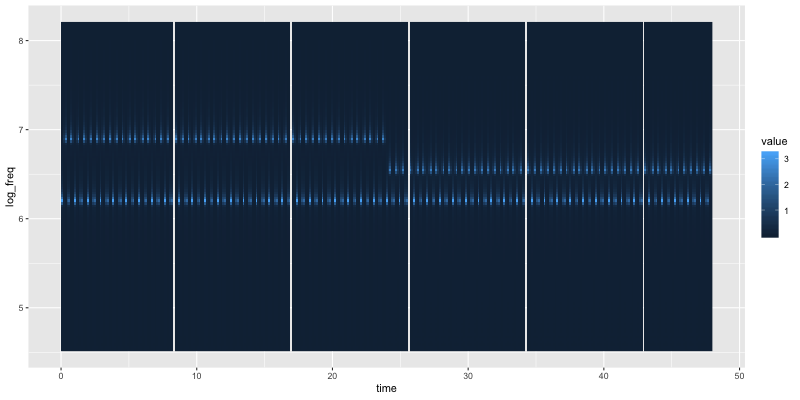

RObject{VecSxp}


In [13]:
import AuditoryBistabilityLE: tone, silence, normpower, dB, amplify
scene12 = [ab(120ms,120ms,1,50,500Hz,12); ab(120ms,120ms,1,50,500Hz,6)] |> normpower |> amplify(-10dB)
plotaxes(filt(audiospect,scene12,false),:time,:freq=>logrange,quantize=(350,128))

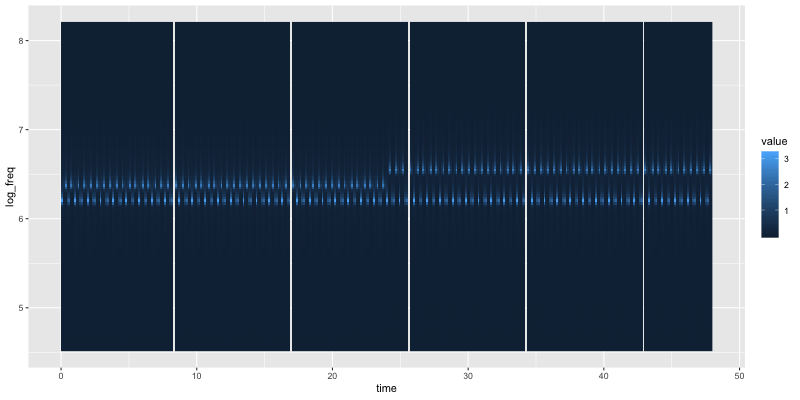

RObject{VecSxp}


In [16]:
scene3 = [ab(120ms,120ms,1,50,500Hz,3); ab(120ms,120ms,1,50,500Hz,6)] |> normpower |> amplify(-10dB)
plotaxes(filt(audiospect,scene3,false),:time,:freq=>logrange,quantize=(350,128))

In [21]:
params = load_params(joinpath(datadir,"params.jld2"))
params[!,:pindex] .= 1:size(params,1)
settings = joinpath("..","src","settings.toml")
settings = TOML.parsefile(settings)
settings["stimulus"]["repeats"] = 18

18

In [22]:
p = copy(params[select_params(params,f_c_a=15,f_c_m=130,Δf=6),:])
p.f_c_σ .= 0.5
p.s_c_a .= 5
p.s_c_m .= 5
p.s_c_σ .= 0.5
p.t_c_a .= 5
p.t_c_m .= 5
p.t_c_σ .= 0.5

1-element Array{Float64,1}:
 0.5

In [31]:
result = bistable_model(scene12,p,settings,intermediate_results=true);

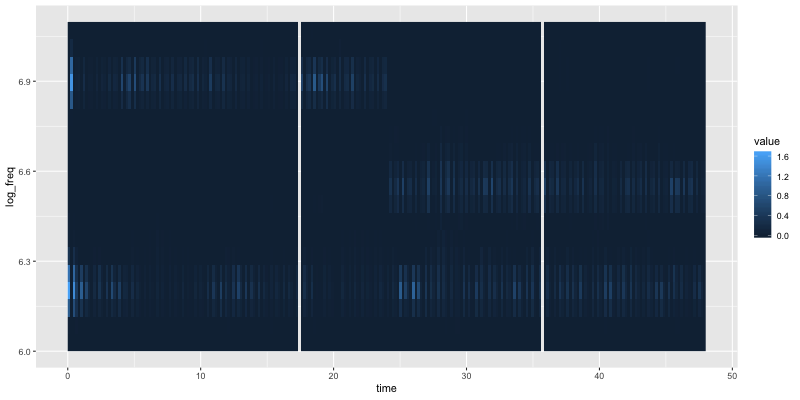

RObject{VecSxp}


In [35]:
plotaxes(result.primary_source,:time,:freq=>logrange,quantize=(250,128))

In [41]:
results = []
# compute spectrogram beforehand to avoid any of it's overhead
spect = filt(Audiospect(;read_settings(settings).freqs.analyze...),scene12)
@showprogress for i in 1:100
    with_logger(NullLogger()) do
        len,val = bistable_model(spect,p,settings,intermediate_results=true).percepts.counts
        push!(results,DataFrame(length=len,response=val.+1,run=i))
    end
end
context12 = vcat(results...);

Auditory Spectrogram: 100%|█████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:08:35


In [43]:
Δ = 0.05
sdf = buildup_mean(context12,delta=Δ,length=9);

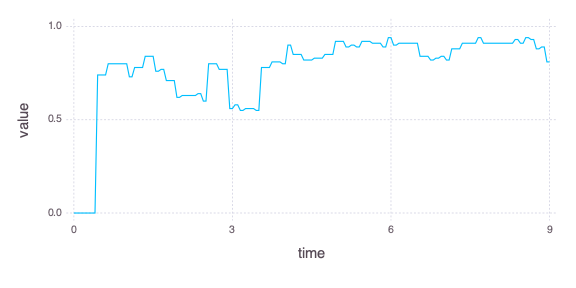

false

In [44]:
draw(PNG(6inch,3inch),plot(sdf,x=:time,y=:value,Geom.line,Coord.cartesian(ymax=1.0,xmax=9)))

# old code

In [4]:
paramfile = joinpath("..","data","count_lengths","run_2018-10-04",
                     "individual_levels_params.feather")
params = getparams(paramfile) do i,row
  abs(row[:t_c_m] - 100) < 1 &&
  abs(row[:t_c_a] - 5) < 1 &&
  row[:Δf] == 12
end

settings = TOML.parsefile(joinpath(srcdir,"settings.toml"))
settings["nmf"]["warn_converge"] = false

false

In [5]:
result = bistable_model(scene12,params,settings,intermediate_results=true,progressbar=true);

Auditory Spectrogram: 100%|█████████████████████████████| Time: 0:00:01
Cortical Model: 100%|███████████████████████████████████| Time: 0:00:02
Cortical Model: 100%|███████████████████████████████████| Time: 0:00:00
Cortical Model: 100%|███████████████████████████████████| Time: 0:00:03
Temporal Coherence Analysis: 100%|██████████████████████| Time: 0:00:05
Source Tracking (multi-prior): 100%|████████████████████| Time: 0:00:09
Adapt/Inhibit: 100%|████████████████████████████████████| Time: 0:00:01
Cortical Model: 100%|███████████████████████████████████| Time: 0:00:01


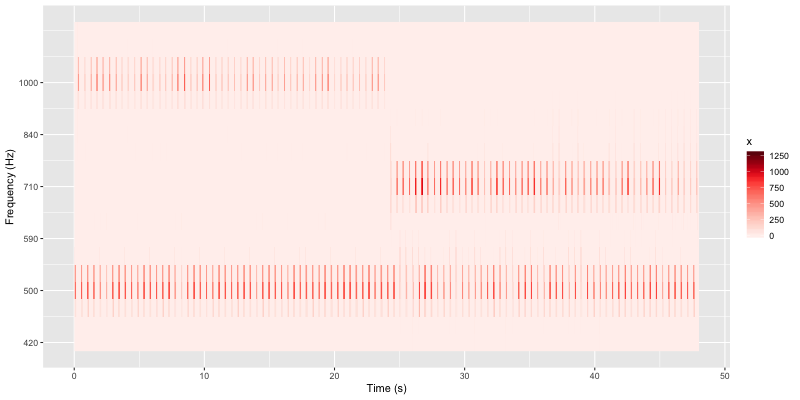

RObject{VecSxp}


In [6]:
rplot(result.primary_source)

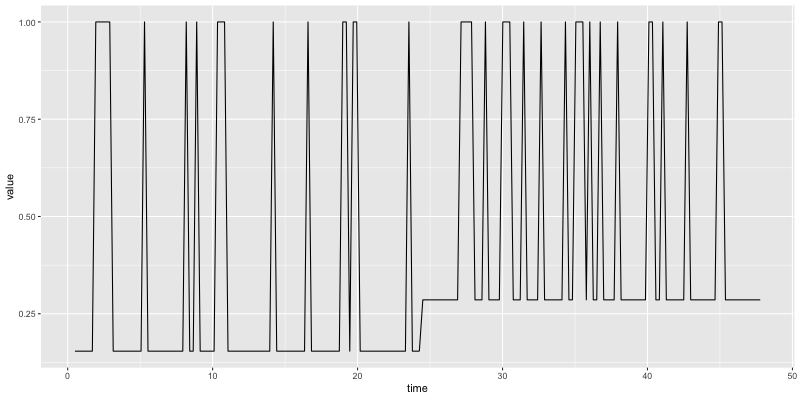

RObject{VecSxp}


In [7]:
rplot(result.percepts.ratio)

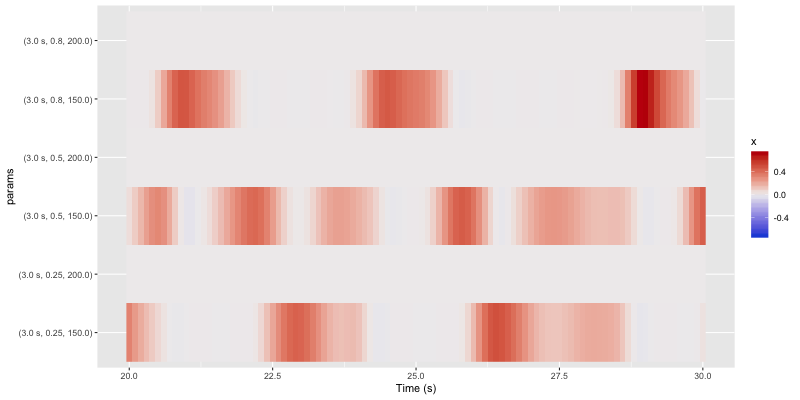

RObject{VecSxp}


In [8]:
rplot(result.sources.outweights[20s .. 30s])

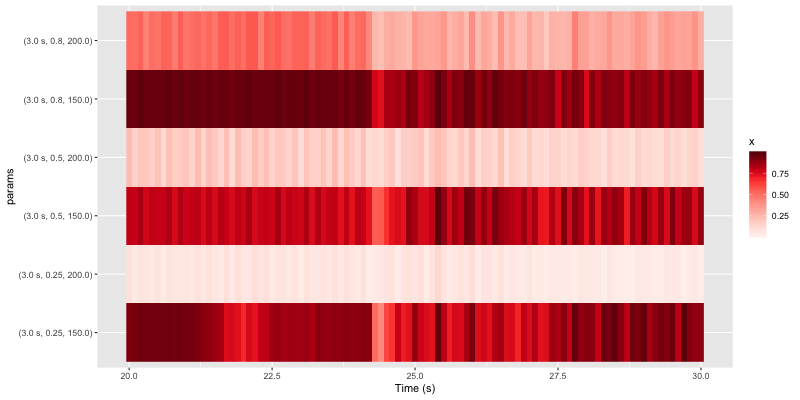

RObject{VecSxp}


In [9]:
rplot(result.sources.inweights[20s .. 30s])

In [11]:
result = bistable_model(scene3,params,settings,intermediate_results=true,progressbar=true);

Auditory Spectrogram: 100%|█████████████████████████████| Time: 0:00:01
Cortical Model: 100%|███████████████████████████████████| Time: 0:00:00
Cortical Model: 100%|███████████████████████████████████| Time: 0:00:00
Cortical Model: 100%|███████████████████████████████████| Time: 0:00:00
Temporal Coherence Analysis: 100%|██████████████████████| Time: 0:00:01
Source Tracking (multi-prior): 100%|████████████████████| Time: 0:00:02


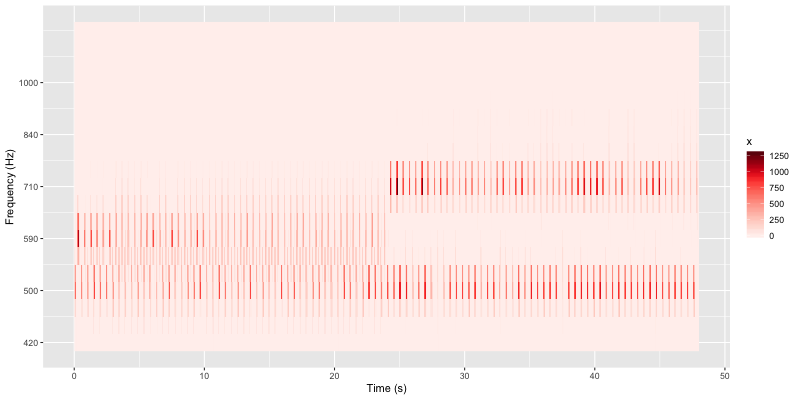

RObject{VecSxp}


In [12]:
rplot(result.primary_source)

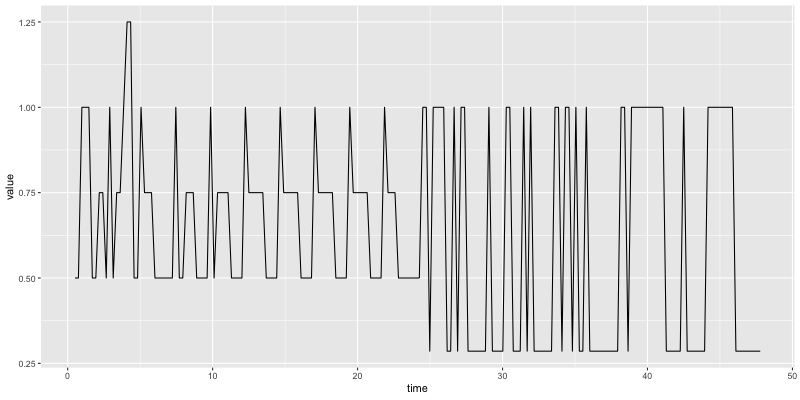

RObject{VecSxp}


In [13]:
rplot(result.percepts.ratio)

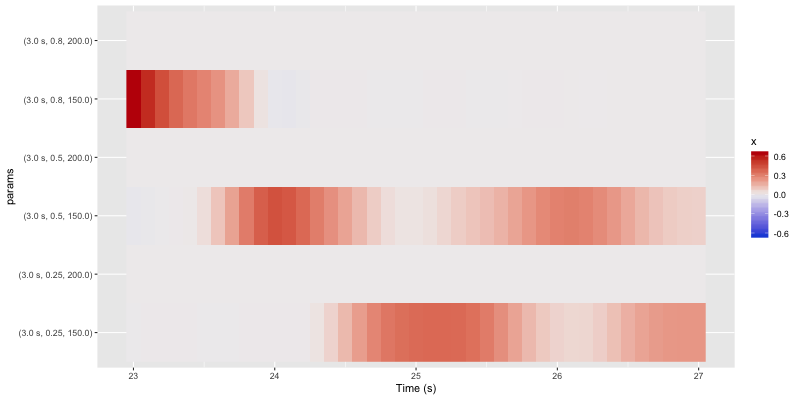

RObject{VecSxp}


In [14]:
rplot(result.sources.outweights[23s .. 27s])

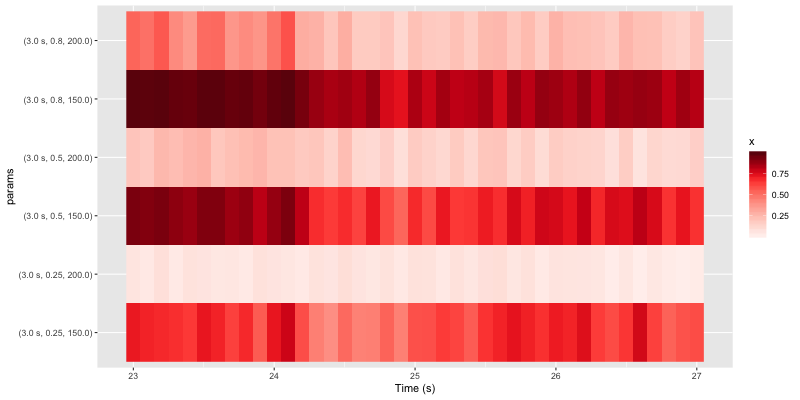

RObject{VecSxp}


In [15]:
rplot(result.sources.inweights[23s .. 27s])

# Repeated simulation

In [19]:
if !isfile("results3.jld2")
    results3=[]
    @showprogress for i in 1:100
        run = bistable_model(scene3,params,settings,intermediate_results=false,progressbar=false);
        push!(results3,(percepts=run.percepts,primary_source=compress!(run.primary_source)))
    end
    save("results3.jld2","results",results3)
else
    results3 = load("results3.jld2","results")
end

Progress: 100%|█████████████████████████████████████████| Time: 0:09:45


In [57]:
df = DataFrame(streaming = mean(map(x -> x.percepts.ratio .< 0.45,results3)),
               time = ustrip.(uconvert.(s,times(results3[1].percepts.ratio))));

Add `using Statistics` to your imports.
  likely near /Users/davidlittle/.julia/packages/IJulia/4VL8h/src/kernel.jl:41


WARN Invalid field type "undefined" for channel "y", using "quantitative" instead.


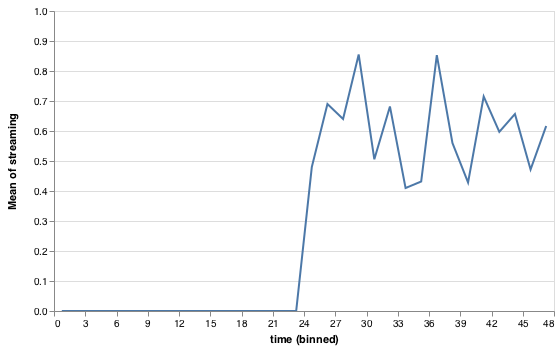

WARN Invalid field type "undefined" for channel "y", using "quantitative" instead.


In [58]:
df |> @vlplot(:line,x={field=:time,bin={step=1.5}},y={field=:streaming,aggregate="mean",scale={domain=[0,1]}},width=500,height=300)

In [67]:
if !isfile("results6.jld2")
    results6=[]
    @showprogress for i in 1:100
        params[:Δf] = 6
        run = bistable_model(100,params,settings,intermediate_results=false,progressbar=false);
        push!(results6,(percepts=run.percepts,primary_source=compress!(run.primary_source)))
    end
    save("results6.jld2","results",results6)
else
    results6 = load("results6.jld2","results");
end

Progress: 100%|█████████████████████████████████████████| Time: 0:07:58


In [75]:
df = DataFrame(streaming = mean(map(x -> x.percepts.ratio .< 0.45,results6)),
               time = ustrip.(uconvert.(s,times(results6[1].percepts.ratio))));

Add `using Statistics` to your imports.
  likely near /Users/davidlittle/.julia/packages/IJulia/4VL8h/src/kernel.jl:41


WARN Invalid field type "undefined" for channel "y", using "quantitative" instead.
WARN Invalid field type "undefined" for channel "y", using "quantitative" instead.


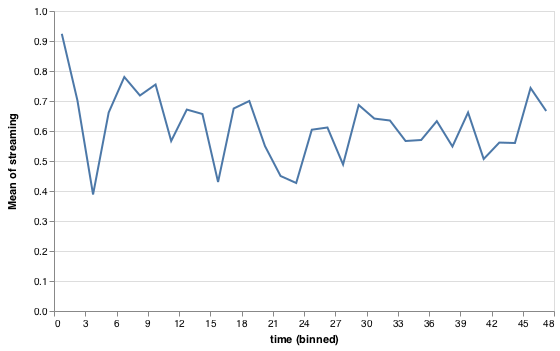

In [78]:
df |> @vlplot(:line,x={field=:time,bin={step=1.5}},y={field=:streaming,aggregate="mean",scale={domain=[0,1]}},width=500,height=300)

In [20]:
if !isfile("results12.jld2")
    results12=[]
    @showprogress for i in 1:100
        run = bistable_model(scene12,params,settings,intermediate_results=false,progressbar=false);
        push!(results12,(percepts=run.percepts,primary_source=compress!(run.primary_source)))
    end
    save("results12.jld2","results",results12)
else
    results12 = load("results12.jld2","results")
end

Progress: 100%|█████████████████████████████████████████| Time: 0:09:51


In [53]:
df = DataFrame(streaming = mean(map(x -> x.percepts.ratio .< 0.45,results12)),
               time = ustrip.(uconvert.(s,times(results12[1].percepts.ratio))));

Add `using Statistics` to your imports.
  likely near /Users/davidlittle/.julia/packages/IJulia/4VL8h/src/kernel.jl:41


WARN Invalid field type "undefined" for channel "y", using "quantitative" instead.


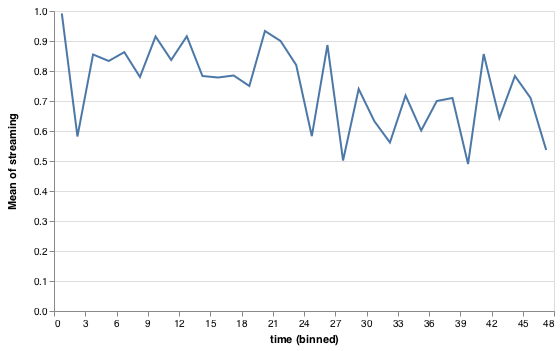

WARN Invalid field type "undefined" for channel "y", using "quantitative" instead.


In [55]:
df |> @vlplot(:line,x={field=:time,bin={step=1.5}},y={field=:streaming,aggregate="mean",scale={domain=[0,1]}},width=500,height=300)